In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [89]:
database = pd.read_csv('database.csv')

database.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,329,normal,7.265076,6.490719,5.837105,7.861153,2.958316,6.915526,5.164356,5.191775,...,11.512426,10.687612,13.186275,12.790031,3.798619,3.165678,2.758158,2.494656,3.092373,2.830248
1,330,normal,7.294932,6.455398,5.497091,7.693888,3.048464,6.997462,5.118763,5.323904,...,11.382575,10.496178,13.163114,12.677342,3.971772,3.420614,2.831661,2.472950,3.034824,2.924207
2,331,normal,8.101461,6.606037,5.809597,7.566532,2.915527,6.695817,5.084102,4.924389,...,11.564506,10.643955,13.181717,12.782085,4.223112,3.303236,2.782225,2.522477,3.144511,2.715381
3,332,normal,8.149318,6.181394,5.523731,7.585691,3.085838,7.096813,5.163067,4.877522,...,11.731514,10.644385,13.266748,12.822743,4.291681,3.811840,3.138734,2.691352,3.159991,2.980692
4,333,normal,7.761231,6.392766,6.036852,7.624368,2.851356,6.795762,4.953513,4.973692,...,11.692599,11.254999,13.397345,12.944275,3.716410,3.307700,2.662943,2.534129,2.967716,3.029605


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 81.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

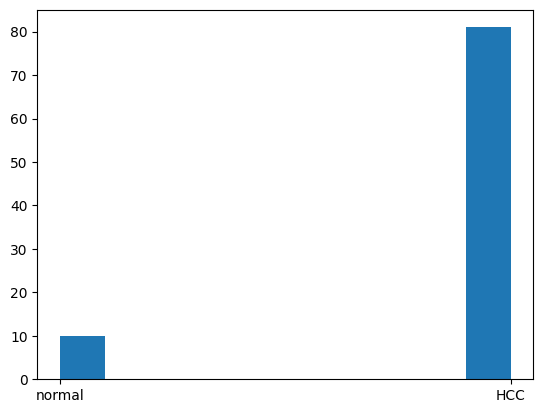

In [90]:
#visualizing the data as histogram
plt.hist(database['type'], bins=10)

In [91]:
database.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 38.0+ MB


In [92]:
# randomize the data
database = database.drop('samples', axis=1)

database.loc[database['type'] == 'normal', 'type'] = 0
database.loc[database['type'] == 'HCC', 'type'] = 1

database['type'] = database['type'].astype(int)

X = database.drop('type', axis=1)
y = database['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

#change the type column to first column
cols = list(train_data.columns)
cols.insert(0, cols.pop(cols.index('type')))
train_data = train_data.loc[:, cols]
test_data = test_data.loc[:, cols]


In [93]:
train_data.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
42,1,7.968171,7.594508,5.897707,7.480953,2.848101,7.364698,4.984893,4.817323,7.948391,...,11.227058,10.263498,13.115581,12.686682,3.202142,3.153964,2.678071,2.386766,2.965637,2.797583
76,1,7.741420,7.249605,6.202653,7.276713,2.770989,7.826971,4.757647,4.752893,7.282325,...,11.514483,10.882351,13.263763,12.829186,3.529440,3.211987,2.760423,2.485943,2.910892,2.838581
21,1,8.036909,6.913778,5.678503,7.656080,2.855999,8.698355,4.884713,4.683158,4.549475,...,11.700918,10.876818,13.469579,13.078707,3.242734,2.970189,2.631056,2.442471,3.024557,2.611535
82,1,7.336487,6.535509,5.404668,7.711718,3.186978,7.181860,5.148856,4.651616,5.442419,...,11.630046,10.815173,13.308303,12.887798,3.962949,3.517553,2.661552,2.478266,3.206888,2.744331
33,1,8.226570,7.035715,5.702683,7.667156,2.865408,7.521745,5.183012,4.919552,6.754086,...,11.282132,10.361925,13.084779,12.708686,3.611454,3.305284,2.577918,2.513277,2.952429,2.655880


(array([ 7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 56.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

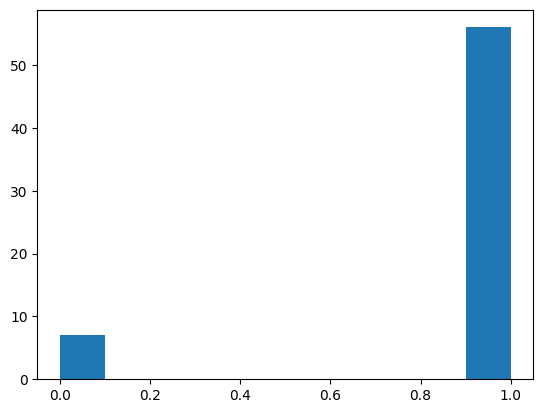

In [94]:
# plot the histogram of the training data to see the distribution
plt.hist(train_data['type'])

(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 25.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

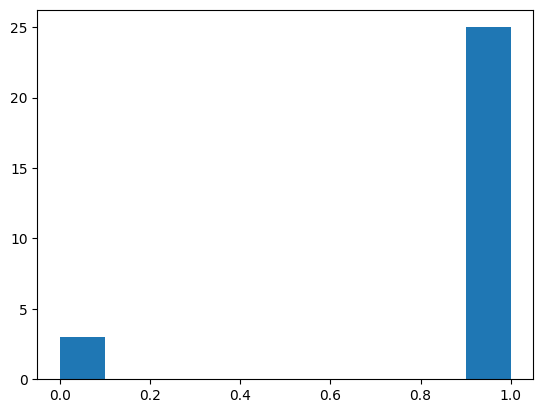

In [95]:
# plot the histogram of the testing data to see the distribution
plt.hist(test_data['type'])

In [96]:
%pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [97]:
train_data.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 42 to 8
Columns: 54676 entries, type to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1)
memory usage: 26.3 MB


In [98]:
import torch.nn as nn

columnsSize = len(train_data.columns) - 1

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(columnsSize, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        return self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))

In [99]:
model = Model()

import torch.optim as optim
import torch

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# convert the data into tensor
train_data_to_model = torch.tensor(train_data.values).float()
test_data_to_model = torch.tensor(test_data.values).float()


# train the model
epochs = 1000
for i in range(epochs):
    model.train()
    logits = model(train_data_to_model[:, 1:]).squeeze()
    loss = criterion(logits, train_data_to_model[:, 0])
    accuracy_score = ((logits >= 0.5) == train_data_to_model[:, 0]).float().mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()

# test the model
logits = model(test_data_to_model[:, 1:]).squeeze()
loss = criterion(logits, test_data_to_model[:, 0])
accuracy_score = ((logits >= 0.5) == test_data_to_model[:, 0]).float().mean()

print('Accuracy score: ', accuracy_score)
print('Loss: ', loss)



Accuracy score:  tensor(1.)
Loss:  tensor(0.0004, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
